## Project, Yash Pratap Solanky

## Project - Analysis of jobs scraped from stackoverflow.com/jobs

We will first scrape the data from stack overflow using beautiful soup.

It is to be noted that most of the data scraped is categorical.

Then convert it into a DataFrame.

Then using seaborn we will plot countplots showcasing the different counts of the categories.

At last, we will use pyplot library to plot a world map showcasing the locations of different jobs

In [19]:
#First we import the required libraries

In [20]:
from time import time,sleep
from random import randint
from IPython.core.display import clear_output
from requests import get
from bs4 import BeautifulSoup
import requests

In [21]:
# This is the URL that we will be scrapping
url = "https://stackoverflow.com/jobs"

In [22]:
# We will be scraping the following information from the website: Title, Location, Requirement and Company name. Note that this
# was the only information listed on the website present without clicking on it explicitly
job_title = []
job_location = []
job_reqs = []
company = []

In [54]:
start_time = time()
requests = 0
#pages = [str(i) for i in range(1,5)]
years_url = [str(i) for i in range(2,42)]

In [55]:
# Most of the structure of scraping using beautifulsoup is taken from the sample project 
headers = {"Accept-Language": "en-US, en;q=0.5"}

In [56]:
for year_url in years_url:

    #for page in pages:

    # Make a get request
    response = get(url + "?pg="+year_url, headers = headers)

    # Pause the loop
    sleep(randint(8,15))

    # Monitor the requests
    requests += 1
    elapsed_time = time() - start_time
    print('Request:{}; Frequency: {} requests/s'.format(requests, requests/elapsed_time))
    clear_output(wait = True)

    # Throw a warning for non-200 status codes
    if response.status_code != 200:
        print('Request: {}; Status code: {}'.format(requests, response.status_code))

        # Break the loop if the number of requests is greater than expected
    if requests > 50:
        print('Number of requests was greater than expected.')  
        break 

        #Parse the content of the request with BeautifulSoup
    page_html = BeautifulSoup(response.text, 'html.parser')

    mv_containers = page_html.find_all("h3", class_ = 'fc-black-700 fs-body1 mb4')
    for container in mv_containers:
        company.append(container.span.text)
            
    mv_containers = page_html.find_all(class_ = 's-link stretched-link')
    for container in mv_containers:
        job_title.append(container.text)

    mv_containers = page_html.find_all("span",class_ = 'fc-black-500')
    for container in mv_containers:
        job_location.append(container.text)

    mv_containers = page_html.find_all(class_ = 'd-inline-flex gs4 fw-wrap')
    for container in mv_containers:
        #print(container.a.text)
        job_reqs.append(container.a.text)

Request:40; Frequency: 0.08916613062357133 requests/s


In [57]:
for i in range(len(company)):
    company[i] = company[i].strip()

In [58]:
for i in range(len(job_location)):
    job_location[i] = job_location[i].strip()

In [59]:
# We scrape a total of 1000 rows of data across 9 pages from the stack overflow website

In [74]:
job_title = job_title[:1000]
job_location = job_location[:1000]
company = company[:1000]
job_reqs = job_reqs[:1000]

In [75]:
# We will now convert the lists into a dataframe

In [76]:
import pandas as pd

jobs = pd.DataFrame({'Job title': job_title,'Company': company,'Location': job_location,'Requirements':job_reqs})
print(jobs.info())
jobs.head(10)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 4 columns):
 #   Column        Non-Null Count  Dtype 
---  ------        --------------  ----- 
 0   Job title     1000 non-null   object
 1   Company       1000 non-null   object
 2   Location      1000 non-null   object
 3   Requirements  1000 non-null   object
dtypes: object(4)
memory usage: 31.4+ KB
None


,Job title,Company,Location,Requirements
0,Software Developer - APIs,"JPMorgan Chase Bank, N.A.","Jersey City, NJ",api
1,VP Engineering at sustainable start-up (m/f/x)...,FINN,"München, Germany",python
2,Backend Software Engineer,Mimacom,"Valencia, Spain",java
3,Senior Software Engineer – Full-stack JavaScri...,Qwire,"Kingston, NY",javascript
4,Head of Software Engineering,EDGE10 Group,"Montreal, QC, Canada",asp.net-mvc
5,Software Engineer - Full Stack,UPowr Pty Ltd,"Sydney, Australia",vue.js
6,Junior Backend (Python / Django) Engineer (m/f/x),Alasco,"München, Germany",django
7,Full Stack Software Developer (remote),Optimile,"Ghent, Belgium",django
8,Fullstack Java Software Engineer,"JPMorgan Chase Bank, N.A.","Chicago, IL",java
9,Fullstack Java Software Engineer,"JPMorgan Chase Bank, N.A.","Chicago, IL",java


In [77]:
jobs["Job title"].value_counts()

Software Engineer                                                          28
Senior Software Engineer                                                   21
Software Engineering                                                       13
Full Stack Software Engineer                                               11
Java Software Engineer                                                     10
                                                                           ..
Senior Manager of Software Engineering, Data Platform (Remote Eligible)     1
Backend Engineer - Partner API                                              1
Backend Java Developer                                                      1
Software Entwickler*in OmniTracker (m/w/d)                                  1
Senior Software Engineer – Container Ecosystem                              1
Name: Job title, Length: 641, dtype: int64

In [78]:
jobs["Company"].value_counts()

JPMorgan Chase Bank, N.A.        166
Clevertech                        11
ByteDance                         11
SSENSE                             9
Personio                           9
                                ... 
BMW Group                          1
Labforward GmbH                    1
Arcanys                            1
Technische Universität Graz        1
Smart Steel Technologies GmbH      1
Name: Company, Length: 402, dtype: int64

In [79]:
jobs["Location"].value_counts()

No office location                   151
London, UK                            78
Columbus, OH                          35
Berlin, Germany                       33
Plano, TX                             31
                                    ... 
Bengaluru, India                       1
Garching bei München, Deutschland      1
Buffalo, NY                            1
Wedemark, Deutschland                  1
São Paulo, Brazil                      1
Name: Location, Length: 197, dtype: int64

In [80]:
jobs["Requirements"].value_counts()

reactjs                   169
java                      162
python                     95
javascript                 91
node.js                    42
                         ... 
machine-learning            1
apache                      1
next.js                     1
restful-authentication      1
etl                         1
Name: Requirements, Length: 84, dtype: int64

In [81]:
import matplotlib.pyplot as plt
import matplotlib
import seaborn as sns

In [89]:
sns.set(rc={'figure.figsize':(10,15)})

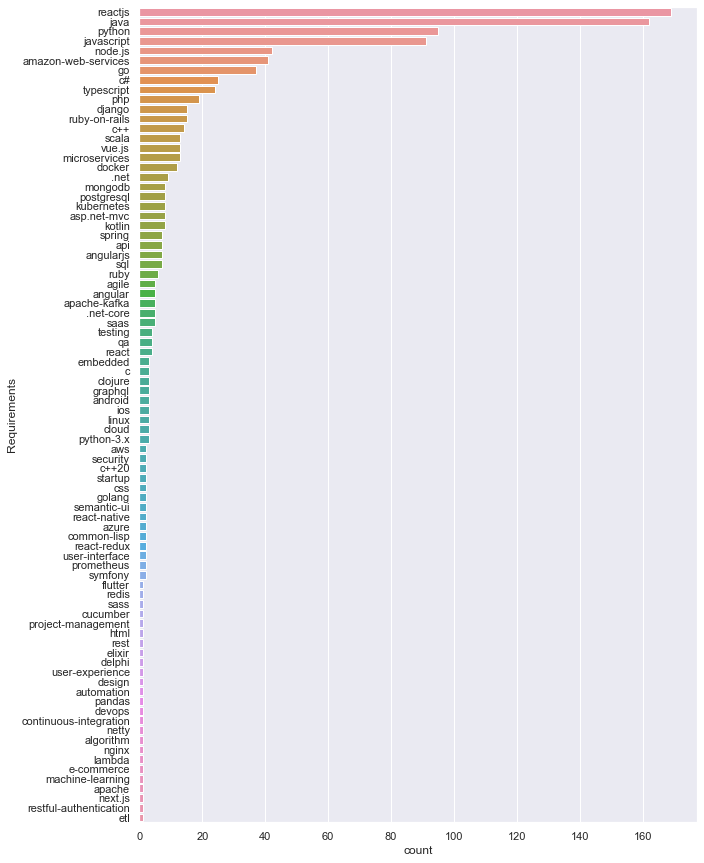

In [90]:
sns.countplot(y=jobs["Requirements"], order = jobs["Requirements"].value_counts().index)

In [91]:
# It can be observed that reactjs is the most common skill across all jobs that we have scraped

In [92]:
sns.set(rc={'figure.figsize':(20,20)})

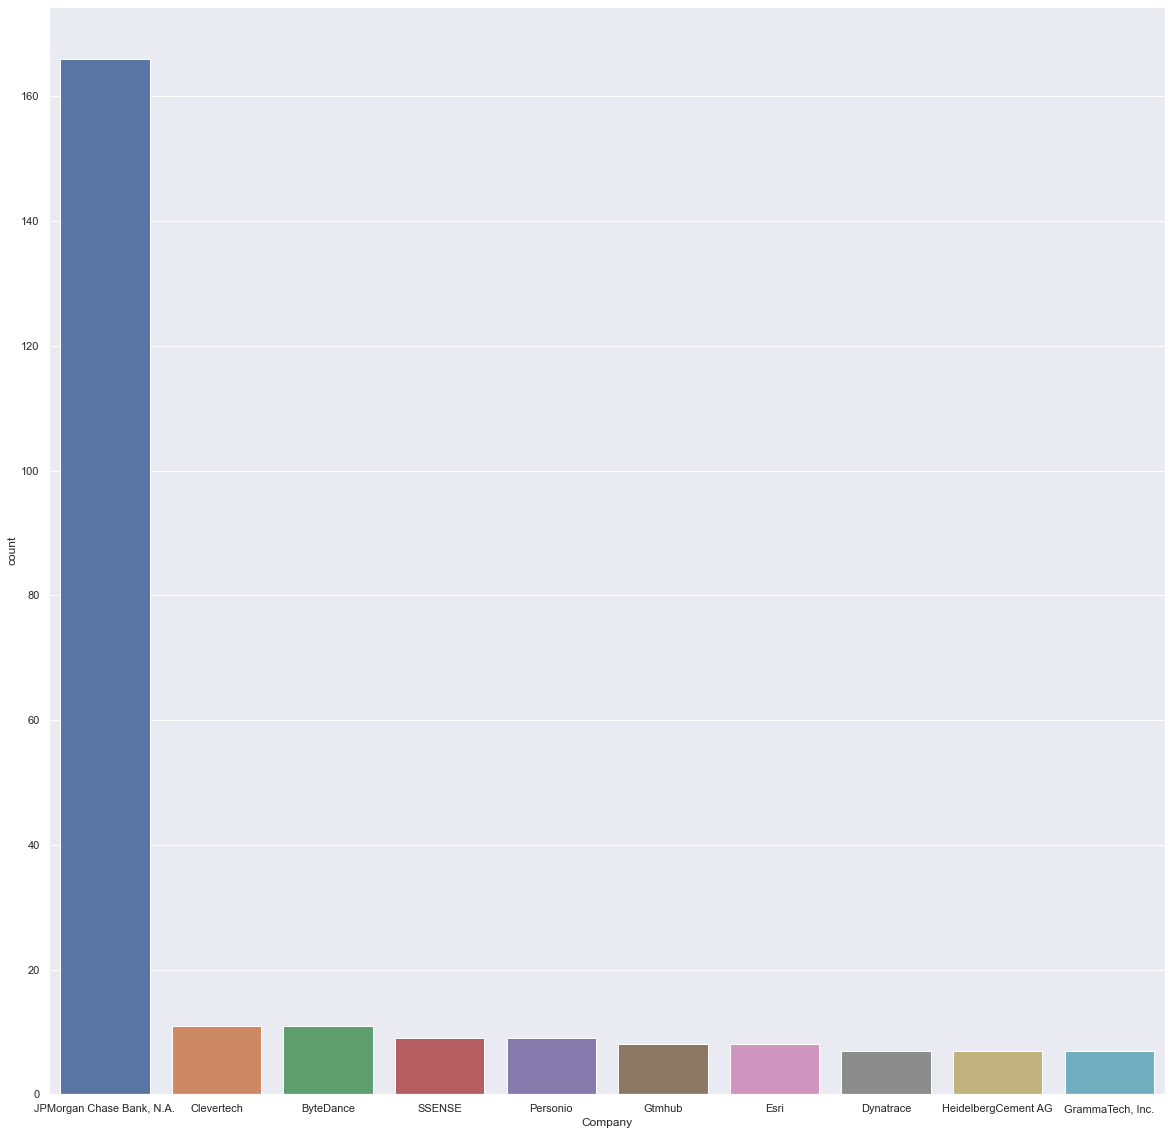

In [93]:
sns.countplot(x=jobs["Company"], order = jobs["Company"].value_counts().iloc[:10].index)

In [94]:
# It can be observed that JP morgan has the highest number of job listings by a huge margin

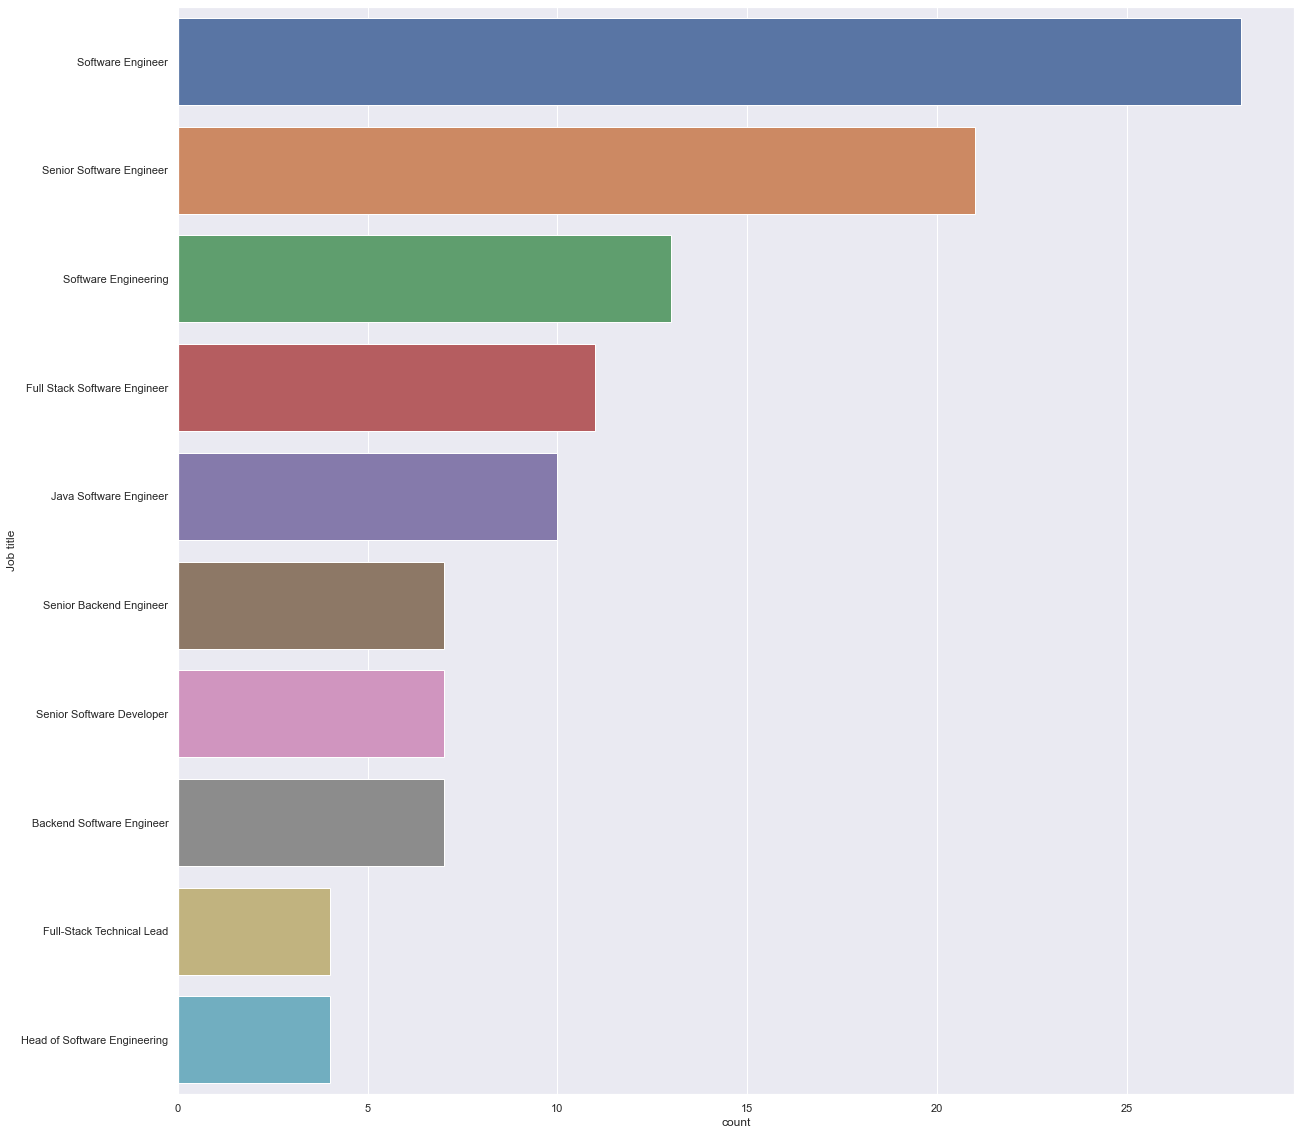

In [95]:
sns.countplot(y=jobs["Job title"], order = jobs["Job title"].value_counts().iloc[:10].index)

In [96]:
# Software enginner seems to be the most common job saught after 

In [97]:
# We will now do some pre processing to be able to display the world map of the location column/

In [98]:
df1 = jobs.copy()
df1 = df1[df1.Location != "No office location"]

In [99]:
cs = []
for i in df1.Location:
    cs.append(i.split()[-1])
US_states = ["AL","AK","AZ","AR","CA","CO","CT","DE","FL","GA","HI","ID","IL","IN","IA","KS","KY","LA","ME","MD","MA","MI","MN","MS","MO","MT","NE","NV","NH","NJ","NM","NY","NC","ND","OH","OK","OR","PA","RI","SC","SD","TN","TX","UT","VT","VA","WA","WV","WI","WY"]

for i in range(len(cs)):
    if cs[i] in US_states:
        cs[i] = "United States"
        
for i in range(len(cs)):
    if cs[i] == "UK":
        cs[i] = "United Kingdom"

In [100]:
import pycountry

input_countries = cs

countries = {}
for country in pycountry.countries:
    countries[country.name] = country.alpha_2

codes = [countries.get(country, 'Unknown code') for country in input_countries]
# Reference - https://stackoverflow.com/questions/16253060/how-to-convert-country-names-to-iso-3166-1-alpha-2-values-using-python

In [101]:
cs

['United States',
 'Germany',
 'Spain',
 'United States',
 'Canada',
 'Australia',
 'Germany',
 'Belgium',
 'United States',
 'United States',
 'Italy',
 'United Kingdom',
 'United States',
 'Netherlands',
 'United Kingdom',
 'Germany',
 'United States',
 'United States',
 'Spain',
 'Germany',
 'United States',
 'United Kingdom',
 'Portugal',
 'Deutschland',
 'Austria',
 'Australia',
 'Denmark',
 'Deutschland',
 'Germany',
 'Germany',
 'Deutschland',
 'Deutschland',
 'Sweden',
 'United States',
 'Estonia',
 'Germany',
 'United States',
 'Australia',
 'Sweden',
 'Sweden',
 'United States',
 'Germany',
 'Netherlands',
 'Czechia',
 'United States',
 'Estonia',
 'United States',
 'United States',
 'Singapore',
 'Australia',
 'Deutschland',
 'United States',
 'United States',
 'Portugal',
 'Netherlands',
 'United Kingdom',
 'Netherlands',
 'Deutschland',
 'United States',
 'Deutschland',
 'Deutschland',
 'United Kingdom',
 'Germany',
 'DC',
 'United States',
 'United Kingdom',
 'Deutschland

In [102]:
codes

['US',
 'DE',
 'ES',
 'US',
 'CA',
 'AU',
 'DE',
 'BE',
 'US',
 'US',
 'IT',
 'GB',
 'US',
 'NL',
 'GB',
 'DE',
 'US',
 'US',
 'ES',
 'DE',
 'US',
 'GB',
 'PT',
 'Unknown code',
 'AT',
 'AU',
 'DK',
 'Unknown code',
 'DE',
 'DE',
 'Unknown code',
 'Unknown code',
 'SE',
 'US',
 'EE',
 'DE',
 'US',
 'AU',
 'SE',
 'SE',
 'US',
 'DE',
 'NL',
 'CZ',
 'US',
 'EE',
 'US',
 'US',
 'SG',
 'AU',
 'Unknown code',
 'US',
 'US',
 'PT',
 'NL',
 'GB',
 'NL',
 'Unknown code',
 'US',
 'Unknown code',
 'Unknown code',
 'GB',
 'DE',
 'Unknown code',
 'US',
 'GB',
 'Unknown code',
 'Unknown code',
 'NL',
 'SG',
 'Unknown code',
 'DE',
 'GB',
 'Unknown code',
 'DE',
 'SG',
 'US',
 'US',
 'PL',
 'GB',
 'Unknown code',
 'NL',
 'SE',
 'DE',
 'US',
 'US',
 'NL',
 'DE',
 'GB',
 'GB',
 'GB',
 'AT',
 'DE',
 'US',
 'US',
 'CA',
 'Unknown code',
 'SG',
 'SE',
 'Unknown code',
 'GB',
 'JP',
 'GB',
 'Unknown code',
 'GB',
 'US',
 'US',
 'US',
 'US',
 'AU',
 'Unknown code',
 'NL',
 'US',
 'GB',
 'GB',
 'DE',
 'CA',
 

In [103]:
for i in range(len(codes)):
    codes[i] = codes[i].lower()

from collections import Counter
codes_c = Counter(codes)
codes_c

Counter({'us': 253,
         'de': 88,
         'es': 13,
         'ca': 13,
         'au': 17,
         'be': 4,
         'it': 5,
         'gb': 103,
         'nl': 45,
         'pt': 7,
         'unknown code': 151,
         'at': 9,
         'dk': 10,
         'se': 25,
         'ee': 5,
         'cz': 4,
         'sg': 19,
         'pl': 6,
         'jp': 14,
         'bg': 8,
         'ar': 3,
         'gr': 3,
         'ie': 5,
         'hu': 5,
         'ch': 6,
         'in': 5,
         'fr': 4,
         'mx': 3,
         'lt': 3,
         'br': 1,
         'tr': 1,
         'sk': 3,
         'il': 1,
         'uy': 2,
         'ro': 2,
         'mt': 2,
         'fi': 1})

In [104]:
from IPython.display import display, HTML

html_doc = """
 <!DOCTYPE html>
 <html>
   <head>
   <script type="text/javascript" 
 src="http://kozea.github.com/pygal.js/javascripts/svg.jquery.js"></script>
   <script type="text/javascript" src="https://kozea.github.io/pygal.js/2.0.x/pygal-tooltips.min.js""></script>
   </head>
   <body>
     <figure>
       {rendered_chart}
     </figure>
   </body>
 </html>
 """
# Reference - https://stackoverflow.com/questions/57735251/how-to-plot-data-on-a-world-map-in-a-jupyter-ipython-notebook-using-pygal-libr

In [105]:
from pygal_maps_world.maps import World
worldmap_chart  = World()
worldmap_chart.title = 'Countries'
worldmap_chart.add("Countries",codes_c,color = "blue")
#worldmap_chart.render_in_browser()

display(HTML(html_doc.format(rendered_chart=worldmap_chart.render(is_unicode=True))))
# from https://www.pygal.org/en/stable/documentation/types/maps/pygal_maps_world.html?highlight=world

In [106]:
# We observe that most job listings are posted for the United States